In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [18]:
data = pd.read_csv('./data/final_data_new.csv')
X = data.drop(columns=['severity_class_1.0', 'severity_class_2.0', 'severity_class_3.0', 
                       'severity_class_4.0', 'severity_class_5.0', 'severity_class_6.0', 
                       'severity_class_7.0', 'severity_class_8.0', 'severity_class_9.0','ev_id'])
y = data[['severity_class_1.0', 'severity_class_2.0', 'severity_class_3.0', 
           'severity_class_4.0', 'severity_class_5.0', 'severity_class_6.0', 
           'severity_class_7.0', 'severity_class_8.0', 'severity_class_9.0']]

# X = X.dropna()        ### Dropping NaN values from X -- fixed, we don't have any more NaNs.
# y = y.loc[X.index]    ### Matching the y data to the X data, after X has been cleaned of NaNs.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb = GaussianNB()
multi_output_clf = MultiOutputClassifier(gnb)
multi_output_clf.fit(X_train, y_train)

/var/folders/zr/t9l_jc197g34mz6rjhqvhjpc0000gn/T/ipykernel_83255/2671174038.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/final_data_new.csv')


MultiOutputClassifier(estimator=GaussianNB())

In [19]:
y_pred = multi_output_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')      
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.00
Precision: 0.38
Recall: 0.97
F1 Score: 0.50


In [31]:

# y_pred_df = y_test.copy()
# y_pred_df.loc[:,:] = y_pred

# y_test_single_column = y_test.idxmax(axis=1).str.extract('(\d+)').astype(int)
# y_pred_single_column = y_pred_df.idxmax(axis=1).str.extract('(\d+)').astype(int)

# # Generate confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
# plt.title('Confusion Matrix for 9-Class Classification')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [12]:
y_single_column = y.idxmax(axis=1).str.extract('(\d+)').astype(int)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_single_column, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

/Users/tudor/opt/anaconda3/envs/phd_main/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [15]:
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')      
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.01
Precision: 0.54
Recall: 0.01
F1 Score: 0.01


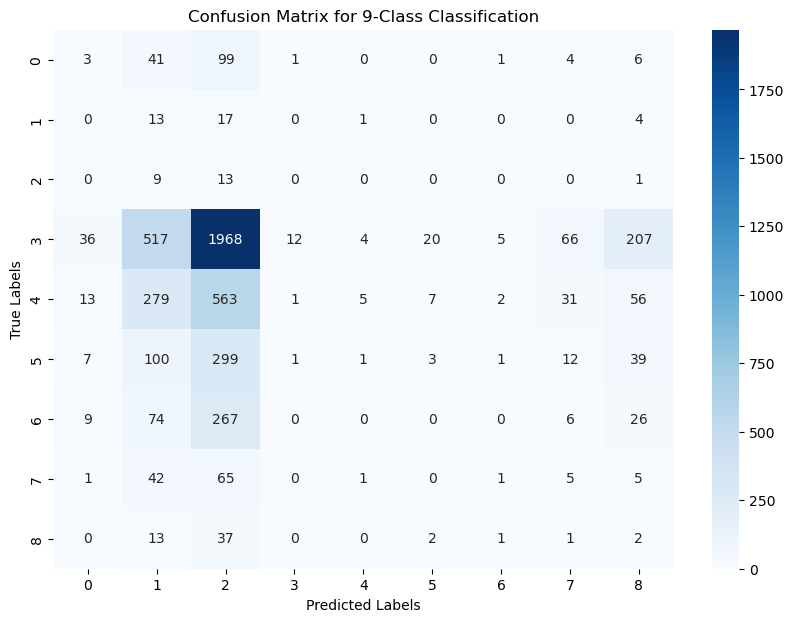

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.title('Confusion Matrix for 9-Class Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()